In [8]:
import random
from deap import base, creator, tools, algorithms

# Define the evaluation function
def eval_func(individual):
    return sum(x ** 2 for x in individual),

# DEAP setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, -5.0, 5.0)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=3)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", eval_func)  # Register the evaluation function

# Genetic Algorithm parameters
population = toolbox.population(n=50)
algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.1, ngen=20)

# Get the best individual after generations
best_ind = tools.selBest(population, k=1)[0]
best_fitness = best_ind.fitness.values[0]

print("Best individual:", best_ind)
print("Best fitness:", best_fitness)

gen	nevals
0  	50    
1  	20    
2  	29    
3  	33    
4  	29    
5  	22    
6  	27    
7  	29    
8  	23    
9  	30    
10 	21    
11 	25    
12 	29    
13 	34    
14 	21    
15 	27    
16 	34    
17 	21    
18 	27    
19 	28    
20 	16    
Best individual: [0.008938471122402047, -0.0015290807135428274, 0.015255455911949111]
Best fitness: 0.000314963288915967


gen	nevals	min    	avg    
0  	40    	5.35336	25.5427
1  	38    	2.06269	20.3878
2  	26    	1.31552	10.9296
3  	38    	0.656943	5.06577
4  	28    	0.620051	2.22886
5  	32    	0.140542	1.40381
6  	35    	0.140542	1.0196 
7  	29    	0.140542	0.523249
8  	26    	0.101194	0.393487
9  	32    	0.0648129	0.222372
10 	31    	0.0651558	0.188429
11 	33    	0.0157265	0.147214
12 	30    	0.0157265	0.43685 
13 	34    	0.011668 	0.12966 
14 	32    	0.00919812	0.374437
15 	31    	0.00790569	0.0744907

Best solution: [0.0772, 0.0053, -0.0437]
Best fitness: 0.007906


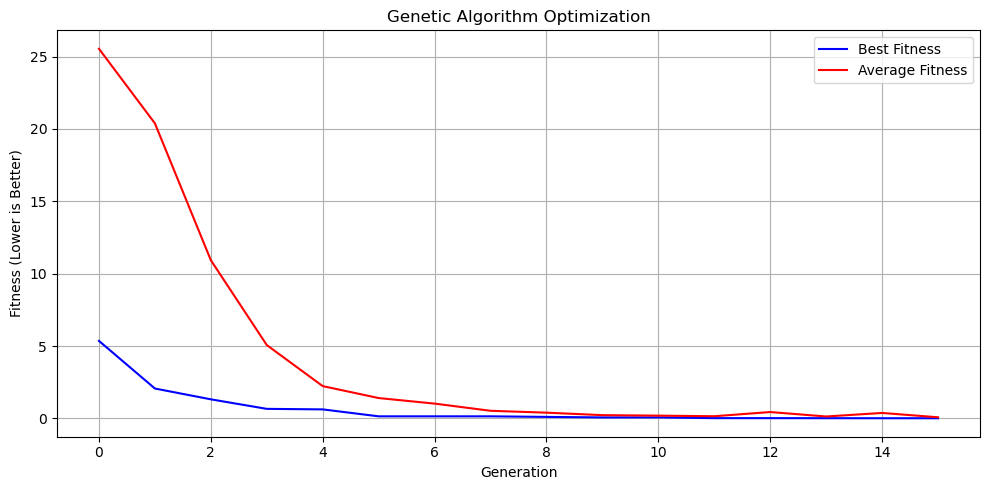

In [9]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

# Clear any existing types
if 'FitnessMin' in creator.__dict__:
    del creator.FitnessMin
if 'Individual' in creator.__dict__:
    del creator.Individual

# Setup optimization problem
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, -5.0, 5.0)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=3)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Evaluation function: sum of squares
def eval_func(individual):
    return sum(x ** 2 for x in individual),

# Register genetic operators
toolbox.register("evaluate", eval_func)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Set random seed for reproducibility
random.seed(42)

# Setup statistics to track
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)

# Create population and run algorithm
pop_size = 40
n_generations = 15
population = toolbox.population(n=pop_size)

# Run GA with statistics tracking
population, logbook = algorithms.eaSimple(
    population, toolbox,
    cxpb=0.7,    # Crossover probability
    mutpb=0.2,   # Mutation probability
    ngen=n_generations,
    stats=stats,
    verbose=True
)

# Get best solution
best_ind = tools.selBest(population, k=1)[0]
print(f"\nBest solution: {[round(x, 4) for x in best_ind]}")
print(f"Best fitness: {round(best_ind.fitness.values[0], 6)}")

# Extract data for plotting
gen = logbook.select("gen")
min_fit = logbook.select("min")
avg_fit = logbook.select("avg")

# Create visualization
plt.figure(figsize=(10, 5))
plt.plot(gen, min_fit, 'b-', label='Best Fitness')
plt.plot(gen, avg_fit, 'r-', label='Average Fitness')
plt.title('Genetic Algorithm Optimization')
plt.xlabel('Generation')
plt.ylabel('Fitness (Lower is Better)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig('ga_optimization.png', dpi=300)